In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import *
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,KFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')
import pickle

SEED = 123

In [3]:
#load data
data = pd.read_csv(r'data\train.csv')

data.shape

(614, 13)

In [7]:
data[data['Dependents']=='3+']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
61,LP001206,Male,Yes,3+,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
74,LP001253,Male,Yes,3+,Graduate,Yes,5266,1774.0,187.0,360.0,1.0,Semiurban,Y
78,LP001263,Male,Yes,3+,Graduate,No,3167,4000.0,180.0,300.0,0.0,Semiurban,N
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
109,LP001384,Male,Yes,3+,Not Graduate,No,2071,754.0,94.0,480.0,1.0,Semiurban,Y
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y


In [8]:
#data.loc[data['Dependents'] == '3+', 'Dependents'] = 3
data['Dependents'] = data['Dependents'].replace({'3+':3})
data[data['Dependents']=='3+']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [9]:
# data= data.drop(columns=['Loan_ID', 'Dependents']) ## Dropping Loan ID
data= data.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [10]:
data.select_dtypes(["int","float"])               

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [11]:
cat = data.select_dtypes("object")
                    
cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [13]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

###  Filling missing values

In [15]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [16]:
data['Gender'].fillna('Female',inplace=True)

In [17]:
data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [18]:
data['Married'].fillna('No',inplace=True)

In [19]:
data['Self_Employed'].fillna('Yes',inplace=True)

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(),inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)
data['Dependents'].fillna(data['Dependents'].median(),inplace=True)

data['Dependents'].astype('int64')

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int64

In [20]:
data['Credit_History'].fillna(data['Credit_History'].median(),inplace=True)


### Exploratory Data Analysis

<Axes: xlabel='count', ylabel='Loan_Status'>

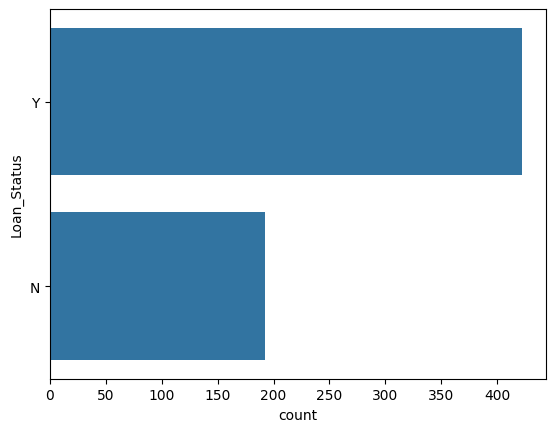

In [21]:
#check the proportion of class distribution

sns.countplot(data['Loan_Status'])

LoanAmount  Loan_Status
9.0         N              1.0
17.0        Y              1.0
25.0        Y              1.0
26.0        Y              1.0
30.0        Y              1.0
                          ... 
500.0       N              1.0
570.0       N              1.0
600.0       Y              1.0
650.0       Y              1.0
700.0       Y              1.0
Name: Loan_Status, Length: 280, dtype: float64


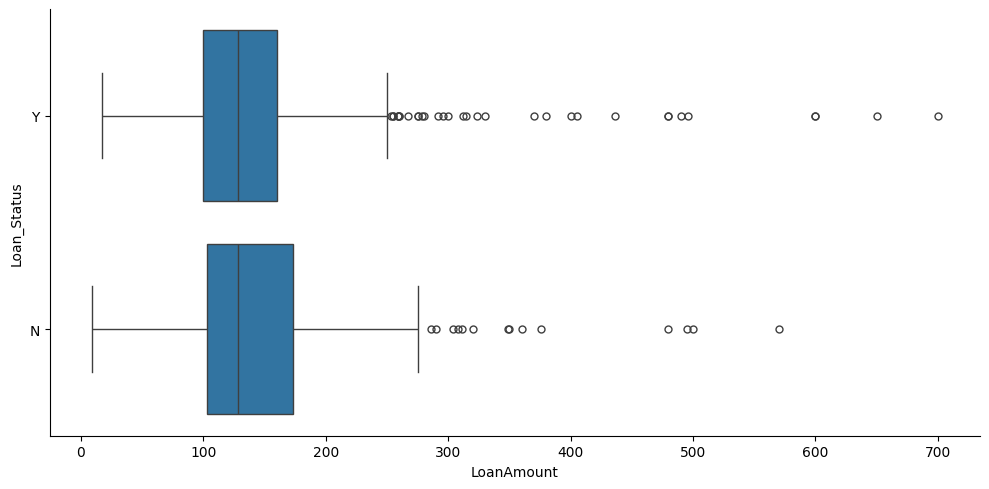

In [22]:
#distribution of the loan status

g = data.groupby('LoanAmount')['Loan_Status'].value_counts(normalize=True)  

print(g)

sns.catplot(x ='LoanAmount',y='Loan_Status',data = data,kind='box',aspect=2)

### Relationship between property area and loan status 

In [23]:
pd.crosstab(data['Property_Area'],data['Loan_Status'])

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


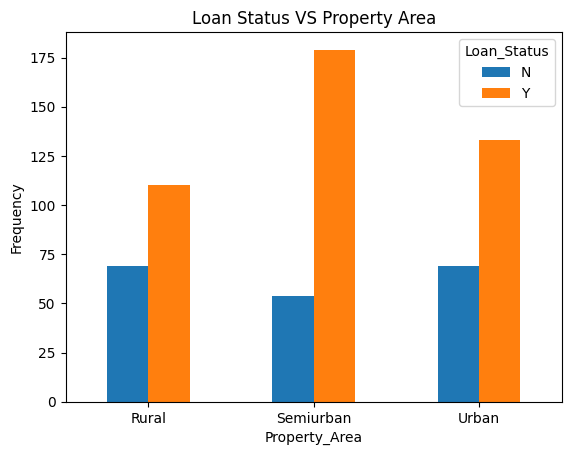

In [24]:
pd.crosstab(data['Property_Area'],data['Loan_Status']).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Loan Status VS Property Area')
plt.xticks(rotation=0);

## Model building

In [25]:
t_target = data['Loan_Status'].map({'Y':1,'N':0})

t_data = data.drop('Loan_Status',1)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [27]:
#split your data into train and test
train_x, test_x, train_y, test_y = train_test_split(t_data, t_target,stratify= t_target, test_size=0.2,
                                                    random_state=SEED)
      
#Converts the categorical variables in numeric
ordin = OrdinalEncoder(cols=t_data[['Gender', 'Married', 'Education', 'Self_Employed','Property_Area']])

Logistic = LogisticRegression(class_weight='balanced',random_state=SEED)
nb = GaussianNB()

dt = DecisionTreeClassifier(random_state=SEED,max_depth=4,min_samples_split=5) 

In [28]:
#pipeline for logistic regression
step1 = [ ('encoder',  ordin),('Logistic', Logistic)]
pipeline1 = Pipeline(step1)
pipeline1 = pipeline1.fit(train_x,train_y)
pred_log = pipeline1.predict(train_x)
pred_Logistic = pipeline1.predict(test_x)

#pipeline for naive bayes
step2 = [ ('encoder',  ordin),('Naive bayes', nb)]
pipeline2 = Pipeline(step2)
pipeline2 = pipeline2.fit(train_x,train_y)
pred_nb = pipeline2.predict(test_x)

#pipeline for decision tree classifier
step3 = [ ('encoder',  ordin),('decision tree', dt)]
pipeline3 = Pipeline(step3)
pipeline1 = pipeline3.fit(train_x,train_y)
pred_dt = pipeline3.predict(test_x)


Logistic_f1  = f1_score(test_y,pred_Logistic)
print('Logistic f1 score :',Logistic_f1) 

nb_f1  = f1_score(test_y,pred_nb)
print('Naive bayes f1 score :',nb_f1) 

dt_f1  = f1_score(test_y,pred_dt)
print('decision f1 score :',dt_f1) 

print('  ') 

Logistic_accuracy  = accuracy_score(test_y,pred_Logistic)
print('Logistic accuracy :',Logistic_accuracy) 

nb_accuracy  = accuracy_score(test_y,pred_nb)
print('Naive bayes accuracy :',nb_accuracy) 

dt_accuracy  = accuracy_score(test_y,pred_dt)
print('decision accuracy :',dt_accuracy) 

 

Logistic f1 score : 0.8131868131868132
Naive bayes f1 score : 0.8717948717948718
decision f1 score : 0.837696335078534
  
Logistic accuracy : 0.7235772357723578
Naive bayes accuracy : 0.7967479674796748
decision accuracy : 0.7479674796747967


In [29]:
df = {'Model': ['Naive bayes', 'Decision tree', 'Logistic regression'],
        'F1 scores': [0.87, 0.83, 0.83],
        'accuracy scores': [0.79, 0.74, 0.74],      
     }

df = pd.DataFrame(df)
print(df)


                 Model  F1 scores  accuracy scores
0          Naive bayes       0.87             0.79
1        Decision tree       0.83             0.74
2  Logistic regression       0.83             0.74


### Save the model

In [30]:
filename = 'loanmodel.sav'
with open(filename,'wb') as ft:
    pickle.dump(pipeline2, ft)